## Week 5 - Part 2 - Spam Classification
### DATA 620 - Web Analytics
### Group 3
+ Rajwant Mishra
+ Md. Jalal Uddin
+ Sarah Wigodsky

YouTube : [here](http://youtu.be/ZiFBX5gbQY8?hd=1) 

#### Dataset

The dataset consists of a list of characteristics from emails and was generated from June-July 1999.
Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835

The dataset and documentation can be found from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Spambase

There are 57 attributes and 1 target variable, listing emails as spam (1) or not spam (0).

There are 48 attributes of word frequency.  This gives the percentage that a particular word appears in comparison with the total number of words in the email. 

There are 6 attributes of character frequency.  This gives the percentage that a character appears in comparison the total number of characters in the email.

There is 1 variable that lists the averate length of uninterupred capital letters.

There is 1 variable that lists the length of the longest sequence of uninterupted captial letters.

There is 1 variable that lists the total number of capital letters in the email.

In [63]:
#import libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

In [24]:
#load data
spam = pd.read_csv('spam.csv', header=None)

#load column titles
col_titles = pd.read_csv('spam_column_names.csv', header=None)
col_titles.columns = ['attributes']
spam.columns = col_titles['attributes']

spam.head()

attributes,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [31]:
# counting number of spam and not spam emails
spam['target'].value_counts()

0    2788
1    1813
Name: target, dtype: int64

The dataset contains 2,788 emails that are not spam and 1,813 emails that are spam.

#### Creating a Test Set and Training Set

In [38]:
#test set will be 30% of data and set a seed
test_size = 0.3
random_state = 512

#separate the target variable from the input variables
X = spam.loc[:,spam.columns != 'target']
y = spam.loc[:,spam.columns == 'target']

#split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#### Run Models

##### Model 1: Decision Tree

A decision tree is a model that is built based on sets of binary decisions.

In [41]:
model_dt = tree.DecisionTreeClassifier()
trained_dt = model_dt.fit(X_train, y_train)
pred_dt = trained_dt.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_dt.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_dt))
print('F1 Score: ', f1_score(y_test, pred_dt))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_dt))

Training Set Accuracy:  0.9996894409937889
Test Set Accuracy:  0.9196234612599565
F1 Score:  0.8939828080229226
Confusion Matrix 
 [[802  74]
 [ 37 468]]


The decision tree model has an accurancy of 0.92 for the test set.  That means that 92% of the predictions were correct.  The F1 score, which is the harmonic mean of the recall and precision, is 0.89. 

##### Model 2: Random Forest
A random forest model is built using many decision trees.  The result of the random forest model is determined by averaging the results of each decision tree in the forest.

In [42]:
model_rf = RandomForestClassifier()
trained_rf = model_rf.fit(X_train, y_train)
pred_rf = trained_rf.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_rf.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_rf))
print('F1 Score: ', f1_score(y_test, pred_rf))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_rf))

Training Set Accuracy:  0.9953416149068323
Test Set Accuracy:  0.9543808834178131
F1 Score:  0.9374379344587885
Confusion Matrix 
 [[846  30]
 [ 33 472]]


C:\Users\Swigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The random forest model was more successful than the decision tree model.  The test set has an accuracy of 0.95 and the F1 score is 0.94.

##### Model 3: Support Vector Machine

A Support Vector Machine, SVM, is built by creating a series of linear separations between the variables in order to create model to predict the target variable.

In [43]:
model_svm = LinearSVC()
trained_svm = model_svm.fit(X_train, y_train)
pred_svm = trained_svm.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_svm.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_svm))
print('F1 Score: ', f1_score(y_test, pred_svm))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_svm))

C:\Users\Swigo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set Accuracy:  0.84472049689441
Test Set Accuracy:  0.833454018826937
F1 Score:  0.8070469798657717
Confusion Matrix 
 [[670 206]
 [ 24 481]]


The SVM model has an accuracy of 0.83 and an F1 score of 0.81.

##### Model 4: Extreme Gradient Boosting (xgboost)

xgboost builds a decision tree and then modifies that decision tree based on its errors.  A learning rate is used to scale the contribution of the new decision tree that is built.  A series of decision trees get built based on the errors from the previous tree.  And each new tree contributes to the model.

In [53]:
#xgboost model does not allow feature names to include commas
X_train.rename(columns={'char_freq_;' : 'char_freq_semicolon',
                        'char_freq_!' : 'char_freq_exclam',
                        'char_freq_$' : 'char_freq_dollar',
                        'char_freq_(' : 'char_freq_paren',
                        'char_freq_[' : 'char_freq_bracket',
                        'char_freq_#' : 'char_freq_pound',
                        'char_freq_[' : 'char_freq_bracket'}, inplace=True)
X_test.rename(columns={'char_freq_;' : 'char_freq_semicolon',
                        'char_freq_!' : 'char_freq_exclam',
                        'char_freq_$' : 'char_freq_dollar',
                        'char_freq_(' : 'char_freq_paren',
                        'char_freq_[' : 'char_freq_bracket',
                        'char_freq_#' : 'char_freq_pound',
                        'char_freq_[' : 'char_freq_bracket'}, inplace=True)

model_xgb = XGBClassifier()
trained_xgb = model_xgb.fit(X_train, y_train)
pred_xgb = trained_xgb.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_xgb.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_xgb))
print('F1 Score: ', f1_score(y_test, pred_xgb))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_xgb))

C:\Users\Swigo\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Swigo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swigo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set Accuracy:  0.962111801242236
Test Set Accuracy:  0.9522085445329471
F1 Score:  0.9339999999999999
Confusion Matrix 
 [[848  28]
 [ 38 467]]


C:\Users\Swigo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Swigo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy in making predictions for the test set is 0.95 and the F1 score is 0.93.

#### Model Selection
The best model was the random forest model.  
Let's describe the model:

In [55]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Feature Importance
The following are the 10 most significant variables being used in the random forest model.


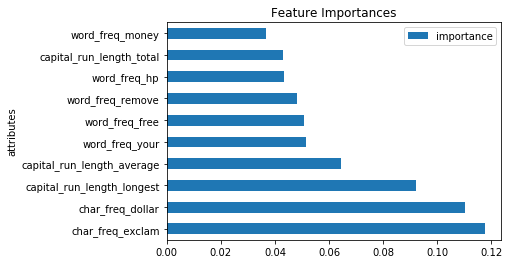

In [60]:
#feature importance
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                  index=X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances[:10]
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

The most important variables to determine whether an email is spam are:
+ the frequency of exclamation points
+ the frequency of dollar signs
+ the longest word madeup of capital letters
+ the average length of words madeup entirely of capital letters
+ the frequency of the word 'your'
+ the frequency of the word 'free'
+ the frequency of the word 'remove'
+ the frequency of the word 'hp'
+ the total number of capital letters
+ the frequency of the word 'money'

To validate this result, we will choose a different seed for splitting the training and testing set and rerun the model.

In [61]:
#test set will be 30% of data and set a seed
test_size = 0.3
random_state = 44

#separate the target variable from the input variables
X = spam.loc[:,spam.columns != 'target']
y = spam.loc[:,spam.columns == 'target']

#split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model_rf = RandomForestClassifier()
trained_rf = model_rf.fit(X_train, y_train)
pred_rf = trained_rf.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_rf.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_rf))
print('F1 Score: ', f1_score(y_test, pred_rf))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_rf))

Training Set Accuracy:  0.9947204968944099
Test Set Accuracy:  0.946415640839971
F1 Score:  0.9309701492537314
Confusion Matrix 
 [[808  19]
 [ 55 499]]


C:\Users\Swigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


This model gives a slightly worse result, but it is still fairly close to the result of the initial random forest model.  This tells us that the ability of the random forest model to accurately predict whether and email is spam or not is robust.